In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install -q pydot
!pip install -q graphviz

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.5.0


In [4]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data","https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

In [5]:
columns_names=['CRIM','EN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATION','B','LSTAT','MEDV']

In [6]:
dataset=pd.read_csv(dataset_path, names = columns_names, na_values = '?', comment = '\t', sep = " ", skipinitialspace = True)

In [7]:
dataset.shape

(506, 14)

In [8]:
dataset.head()

,CRIM,EN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
train_data=dataset.sample(frac=0.8, random_state = 0)
test_data=dataset.drop(train_data.index)

# Modelagem Preditiva utilizando regressão linear simples
## Na regressão linear simples iremos relacionar uma variável de saída (y) a uma variável de entrada (x).
## y: RM
## x: MEDV
## Isso irá nos permitir prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.
## Iniciaremos construindo um plot par exibir a atual relação entre as duas variáveis.

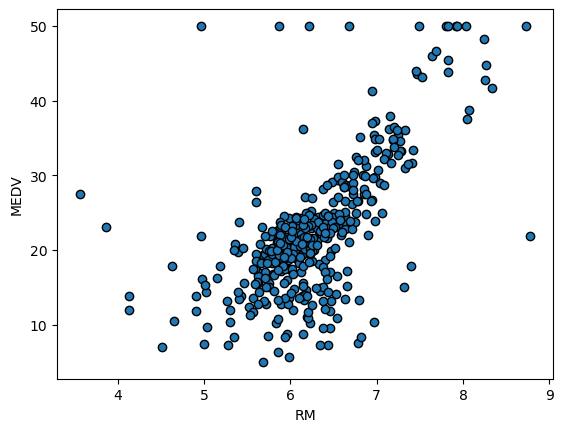

In [10]:
fig, ax=plt.subplots()
x = train_data['RM']
y = train_data['MEDV']
ax.scatter(x,y,edgecolors=(0,0,0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

In [11]:
x_train=train_data['RM']
y_train=train_data['MEDV']
x_test=test_data['RM']
y_test=test_data['MEDV']

# Criação do Modelo
### Queremos encontrar os paramêtros W que permitem prever a saída y a partir da entrada x:
$y = w1 x + w0$
### A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:
### layers.Dense(1,use_bias=True, input_shape(1,))

In [12]:
def linear_model():
    
    #cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias=True, input_shape=(1,), name='layer')])
                
    #otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, beta_1=0.9, beta_2=0.99, epsilon=1e-05, amsgrad=False, name="Adam")
    
    #compila modelo - mae: Mean absolute error, mse: Mean squared error
    model.compile(loss='mse',optimizer=optimizer,metrics=['mae','mse'])
    
    return model

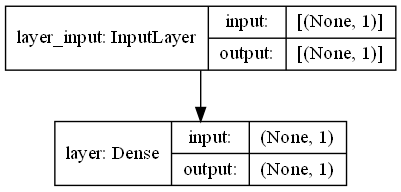

In [13]:
model = linear_model()
tf.keras.utils.plot_model(model,
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=False,
                          dpi=100)

## Treinamento do Modelo

In [16]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_train.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [17]:
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [18]:
predictions=[]
checkpoint_path = "dados/"

In [19]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [21]:
# Salva a primeira versão do modelo
model.save_weights(checkpoint_path.format(epoch = 0))

In [23]:
history = model.fit(x_train, 
                     y_train, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 1s 237ms/step - loss: 201.1141 - mae: 11.9204 - mse: 201.1141 - val_loss: 264.6909 - val_mae: 13.1965 - val_mse: 264.6909
Epoch 2/4000
2/2 [==============================] - 0s 93ms/step - loss: 197.6175 - mae: 11.7892 - mse: 197.6175 - val_loss: 260.8446 - val_mae: 13.0719 - val_mse: 260.8446
Epoch 3/4000
2/2 [==============================] - 0s 91ms/step - loss: 194.0751 - mae: 11.6567 - mse: 194.0751 - val_loss: 257.0430 - val_mae: 12.9474 - val_mse: 257.0430
Epoch 4/4000
2/2 [==============================] - 0s 91ms/step - loss: 190.6916 - mae: 11.5267 - mse: 190.6916 - val_loss: 253.2818 - val_mae: 12.8228 - val_mse: 253.2818
Epoch 5/4000
2/2 [==============================] - 0s 80ms/step - loss: 187.3452 - mae: 11.3964 - mse: 187.3452 - val_loss: 249.5733 - val_mae: 12.6985 - val_mse: 249.5733
Epoch 6/4000
2/2 [==============================] - 0s 78ms/step - loss: 183.9526 - mae: 11.2667 - mse: 183.9526 - val_loss: 245.9194 

In [24]:
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


In [25]:
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [26]:
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [27]:
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [29]:
df.head()

,MSE em Treino,MSE em Validação
0,201.114059,264.690948
1,197.617493,260.844574
2,194.075119,257.043030
3,190.691574,253.281769
4,187.345184,249.573288


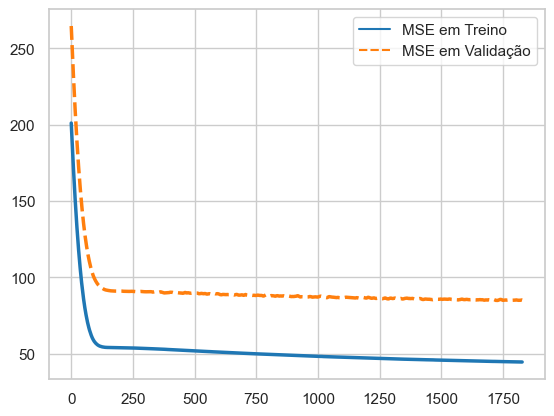

In [35]:
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)
plt.show()

In [40]:
predicts=model.predict(x_train).flatten()
predicts

array([22.842955 , 22.162931 , 23.075438 , 17.1238   , 22.255926 ,
       19.942694 , 20.355356 , 20.721518 , 14.938433 , 23.261427 ,
       20.657583 , 24.726088 , 22.889452 , 13.072735 , 31.380995 ,
       26.957952 , 22.314047 , 28.387743 , 24.080938 , 20.035685 ,
       23.383482 , 20.21005  , 21.64565  , 23.708963 , 19.059248 ,
        8.48695  , 20.704084 , 19.216173 , 32.93284  , 21.442225 ,
       21.982756 , 21.37829  , 22.221052 , 21.459661 , 23.325361 ,
       19.762514 , 20.83195  , 20.18099  , 22.930136 , 21.849077 ,
       21.64565  , 19.663706 , 21.74446  , 17.577148 , 24.046068 ,
       23.354422 , 19.686956 , 21.657274 , 14.531582 , 25.13294  ,
       21.790953 , 18.9895   , 20.797075 , 34.037148 , 19.495157 ,
       20.262358 , 19.198736 , 20.314669 , 19.495157 , 20.675024 ,
       20.233297 , 21.56428  , 26.615034 , 24.115812 , 19.23942  ,
       24.139063 , 24.714464 , 23.098688 , 25.859457 , 20.273981 ,
       22.529097 , 22.56978  , 22.59303  , 25.987326 , 25.2666